<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [4]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [5]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [11]:
data = load_data('NVDA')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,4.6275,4.655,4.5275,4.6225,4.240231,80020400
1,2010-01-05,4.6050,4.740,4.6050,4.6900,4.302146,72864800
2,2010-01-06,4.6875,4.730,4.6425,4.7200,4.329668,64916800
3,2010-01-07,4.6950,4.715,4.5925,4.6275,4.244817,54779200
4,2010-01-08,4.5900,4.670,4.5625,4.6375,4.253988,47816800


In [12]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,4.6275,4.655,4.5275,4.6225,80020400
1,4.6050,4.740,4.6050,4.6900,72864800
2,4.6875,4.730,4.6425,4.7200,64916800
3,4.6950,4.715,4.5925,4.6275,54779200
4,4.5900,4.670,4.5625,4.6375,47816800


Visualizing Closing Price

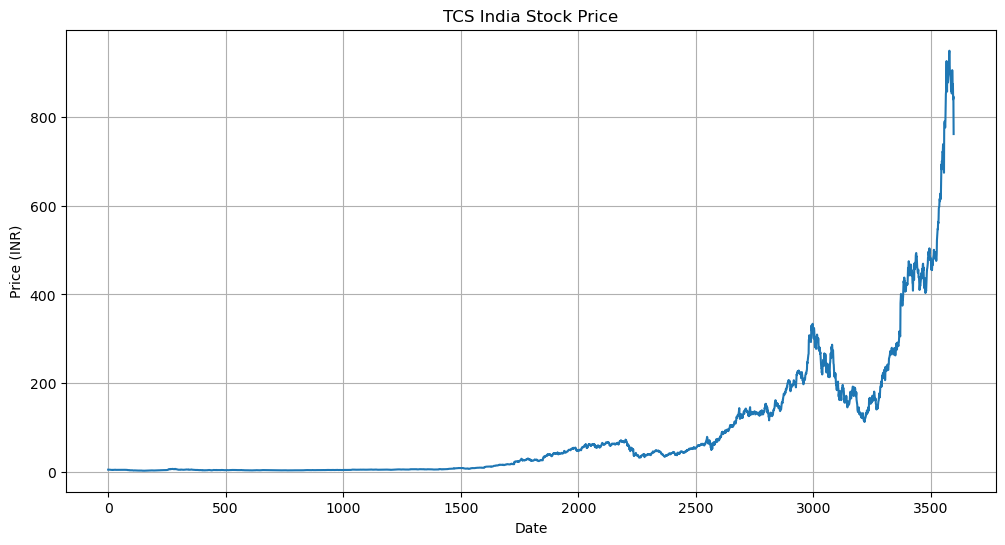

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

,Open,High,Low,Close,Volume
0,4.627500,4.655000,4.527500,4.622500,80020400
1,4.605000,4.740000,4.605000,4.690000,72864800
2,4.687500,4.730000,4.642500,4.720000,64916800
3,4.695000,4.715000,4.592500,4.627500,54779200
4,4.590000,4.670000,4.562500,4.637500,47816800
...,...,...,...,...,...
3593,890.979980,906.130005,859.289978,860.010010,44307700
3594,864.330017,881.179993,860.640015,874.150024,37045300
3595,883.400024,887.750000,839.500000,840.349976,49540000
3596,849.700012,861.900024,824.020020,846.710022,44726000


# Plotting moving averages of 100 day

---



In [48]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3593    673.755199
3594    677.455800
3595    680.864899
3596    684.460399
3597    687.302799
Name: Close, Length: 3598, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

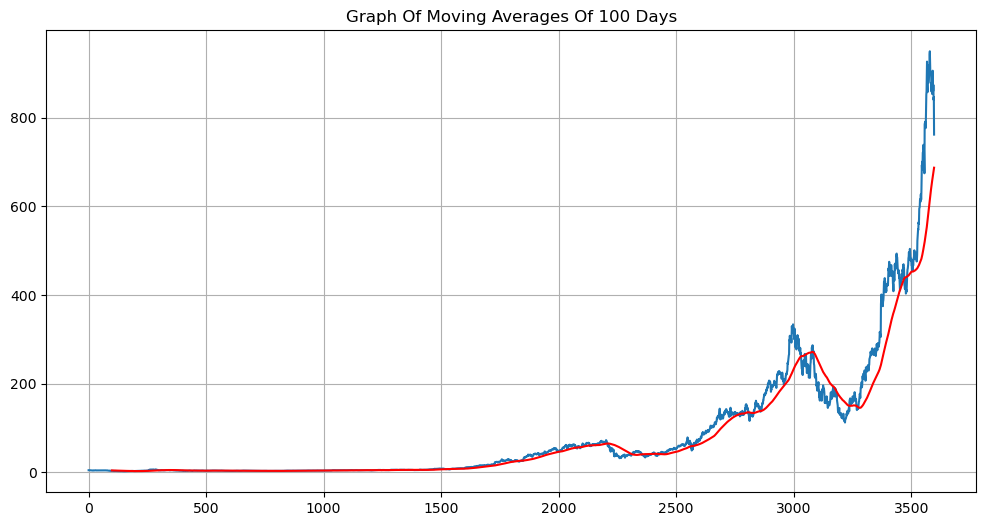

In [49]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [50]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3593    560.67860
3594    563.00825
3595    565.09490
3596    567.20780
3597    568.90195
Name: Close, Length: 3598, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

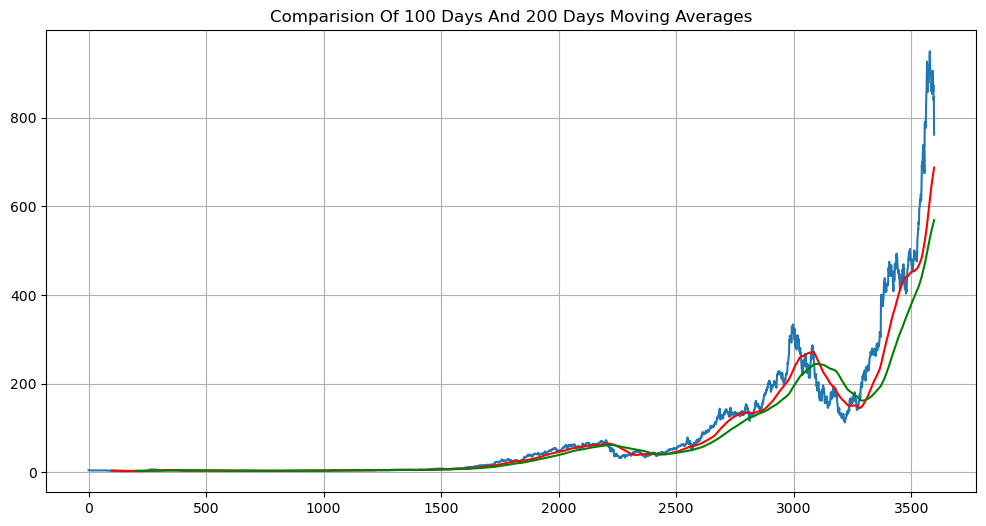

In [51]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [3]:
df.shape

NameError: name 'df' is not defined

# Spliting the dataset into training (70%) and testing (30%) set

In [2]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

NameError: name 'pd' is not defined

In [54]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,4.6275,4.655,4.5275,4.6225,4.240230,80020400
1,2010-01-05,4.6050,4.740,4.6050,4.6900,4.302147,72864800
2,2010-01-06,4.6875,4.730,4.6425,4.7200,4.329666,64916800
3,2010-01-07,4.6950,4.715,4.5925,4.6275,4.244816,54779200
4,2010-01-08,4.5900,4.670,4.5625,4.6375,4.253987,47816800


In [55]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2518,2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031551,26263600
2519,2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
2520,2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858273,27710800
2521,2020-01-09,60.962502,61.482498,60.215000,60.755001,60.515675,25511200
2522,2020-01-10,61.832500,62.137501,60.937500,61.080002,60.839390,31629600


# Using MinMax scaler for normalization of the dataset

---



In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [62]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03426269],
       [0.03522533],
       [0.03565316],
       ...,
       [0.80725904],
       [0.82369515],
       [0.81000435]])

In [63]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [64]:
x_train.shape

(2418, 100, 1)

# ML Model (LSTM)

---



In [65]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               96480     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
          

# Training the model

---



In [67]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
76/76 [==============================] - 26s 206ms/step - loss: 0.0031 - mean_absolute_error: 0.0424
Epoch 2/10
76/76 [==============================] - 14s 180ms/step - loss: 0.0029 - mean_absolute_error: 0.0416
Epoch 3/10
76/76 [==============================] - 14s 178ms/step - loss: 0.0031 - mean_absolute_error: 0.0415
Epoch 4/10
76/76 [==============================] - 13s 173ms/step - loss: 0.0029 - mean_absolute_error: 0.0409
Epoch 5/10
76/76 [==============================] - 13s 174ms/step - loss: 0.0029 - mean_absolute_error: 0.0397
Epoch 6/10
76/76 [==============================] - 13s 172ms/step - loss: 0.0027 - mean_absolute_error: 0.0381
Epoch 7/10
76/76 [==============================] - 12s 157ms/step - loss: 0.0027 - mean_absolute_error: 0.0387
Epoch 8/10
76/76 [==============================] - 12s 155ms/step - loss: 0.0028 - mean_absolute_error: 0.0384
Epoch 9/10
76/76 [==============================] - 13s 168ms/step - loss: 0.0026 - mean_absolute_error:

In [68]:
model.save('keras_model.h5')

c:\Users\Asus\anaconda3\envs\carlcv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
test_close.shape

(1080, 1)

In [70]:
past_100_days = pd.DataFrame(train_close[-100:])

In [71]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [72]:
final_df = past_100_days.append(test_df, ignore_index = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_36580\1505569079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [73]:
final_df.head()

,0
0,39.012501
1,37.517502
2,37.192501
3,39.889999
4,42.695000


In [74]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.99380459e-03],
       [3.56037429e-04],
       [0.00000000e+00],
       ...,
       [8.79856773e-01],
       [8.86824186e-01],
       [7.94024593e-01]])

In [75]:
input_data.shape

(1180, 1)

# Testing the model

---



In [76]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [77]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1080, 100, 1)
(1080,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [78]:
# Making predictions

y_pred = model.predict(x_test)

34/34 [==============================] - 3s 60ms/step


In [79]:
y_pred.shape

(1080, 1)

In [80]:
y_test

array([0.02418036, 0.02496638, 0.02508963, ..., 0.87985677, 0.88682419,
       0.79402459])

In [81]:
y_pred

array([[0.06162581],
       [0.06186622],
       [0.0620974 ],
       ...,
       [0.8416947 ],
       [0.8407657 ],
       [0.8390049 ]], dtype=float32)

In [82]:
scaler.scale_

array([0.0010955])

In [83]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

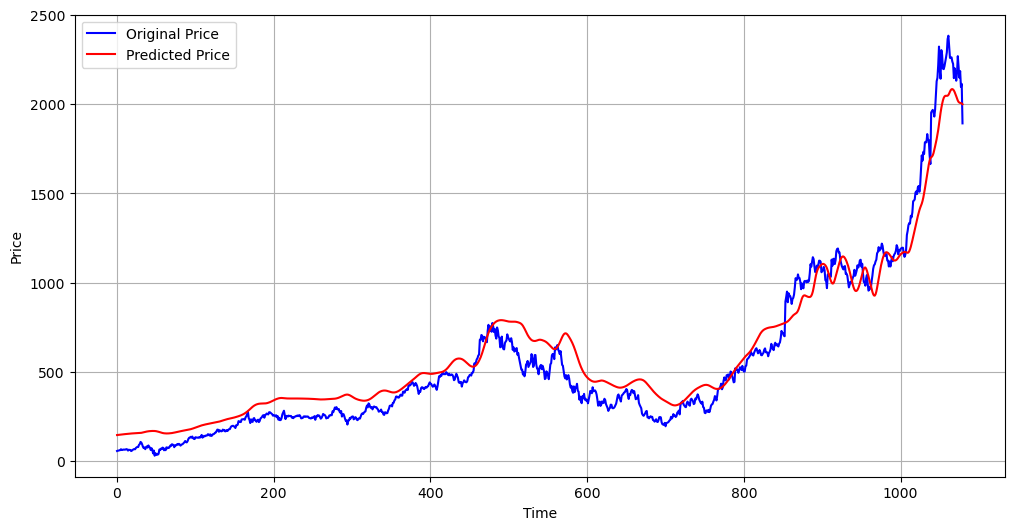

In [84]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [85]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 16.84%


Calculation of R2 score

In [86]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9463686562618848


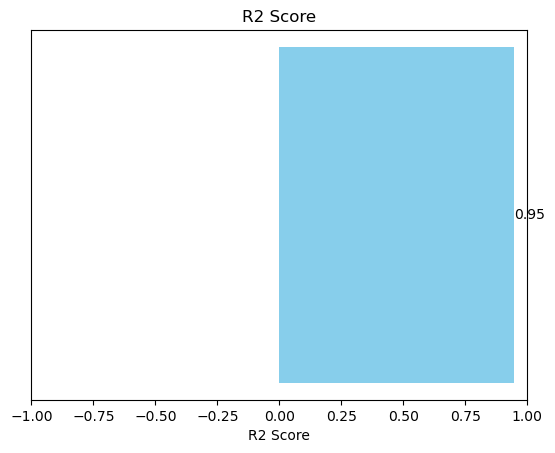

In [87]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

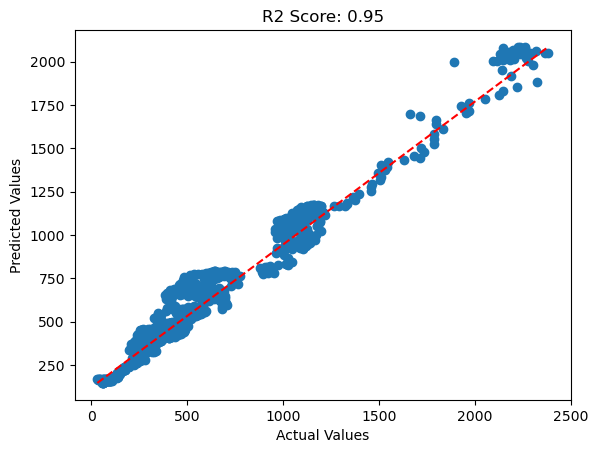

In [88]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()